In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x = np.random.rand(100) * 2
y = 1.5 * x + np.random.randn(100) * 0.1

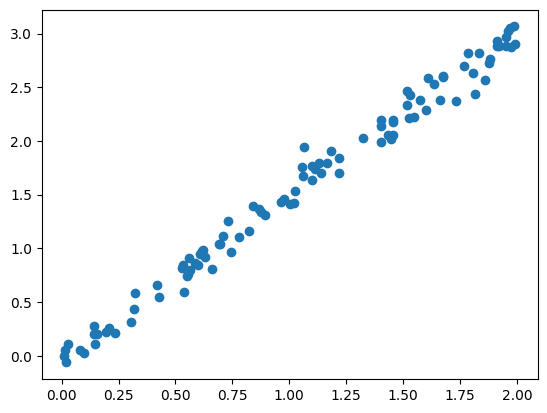

In [23]:
plt.scatter(x, y)

이런 데이터가 주어졌을 때 우리는 $y=ax$의 경향성을 볼 수 있고 $a$값을 찾는 과정이 선형회귀이다

그런데 각 데이터에는 오차가 있고 이것을 고려하여 어떤 값을 $a$로 둘지 판단해야 한다.

(0.0, 3.0)

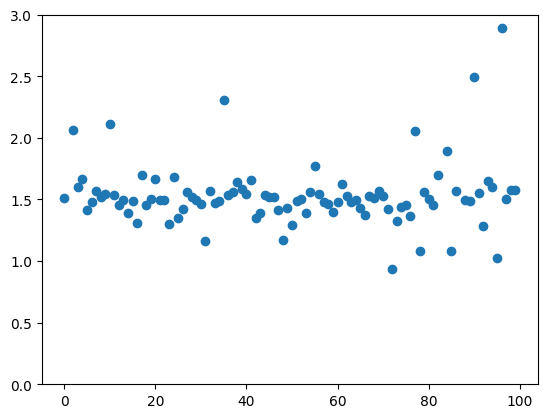

In [4]:
plt.scatter(list(range(len(x))), y / x)
plt.ylim(0, 3)

$y/x$의 값을 구하면 이런 분포를 나타낸다. 우리는 이걸 보고 평균이 1.5라고 쉽게 알 수 있다.<br>

하지만 상수항이 추가되거나 이차함수 형태가 된다면 알아보기 힘들어진다.<br>
이 상황에서 사용할 수 있는 것이 경사하강법이다.<br>

상수항이 있다고 가정하고 풀어보자<br>
$X, Y$가 실제 데이터라고 하고 우리는 f(x)=ax+b라는 함수로 예측을 한다고 가정하자.<br>
그러면 mse오차에서 cost는 아래와 같이 나타난다.<br>
$cost(a, b) = \left(Y - \left(aX + b\right)\right)^2$<br>
이것을 최소로 만들어야 하는데 경사하강법은 cost가 가장 빠르게 감소하는 방향을 구하는 것이다.<br>
이 방향은 아래와 같이 나타난다.<br>
$$
-\nabla f(a, b) = -\begin{bmatrix}
\frac{\partial f}{\partial a} \\
\frac{\partial f}{\partial b}
\end{bmatrix} =
\begin{bmatrix}
2X \left(Y - (aX + b)\right) \\
2 \left(Y - (aX + b)\right)
\end{bmatrix}
$$<br>
사실 이 값이 0이 되는 지점들이 극대, 극소라서 정확한 값을 구할 수는 있다. 그런데 식이 많이 복잡해지고 중간중간 미분 불가능 지점이 섞여 있으면 매우 어려워진다.<br>

보통 여기에 learning rate를 곱하여 a, b에 더하면서 업데이트한다.<br>
기울기가 너무 커지는 경우를 대비하여 더하는 벡터의 크기를 일정하게 해도 된다.<br>
미지수, 데이터의 차원이 커져도 동일하게 가장 빠르게 감소하는 방향으로 이동하게 만들면 된다.<br>

In [12]:
x = np.random.rand(100) * 2
y = 1.5 * x + np.random.randn(100) * 0.1 + 2

a, b = 0, 0
function = lambda x: a * x + b

data_size = len(x)
batch_size = 10
epoches = 100
learning_rate = 0.01

cost_list = []
for epoch in range(epoches):
    for i in range(0, data_size, batch_size):
        x_batch = x[i:i + batch_size]
        y_batch = y[i:i + batch_size]

        pred = function(x_batch)

        grad_a = 2 * x_batch * (y_batch - pred)
        grad_b = 2 * (y_batch - pred)

        a += learning_rate * grad_a.mean()
        b += learning_rate * grad_b.mean()

    cost = np.mean((y - function(x)) ** 2)
    cost_list.append(cost)
    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1}, a: {a}, b: {b}, cost: {cost}")

epoch: 10, a: 1.7261926702811259, b: 1.7021182285962002, cost: 0.03982531719544377
epoch: 20, a: 1.6722427894515186, b: 1.814450375603951, cost: 0.02301786215572593
epoch: 30, a: 1.6172436981396505, b: 1.8779003549847224, cost: 0.015905066227854342
epoch: 40, a: 1.5786626923948708, b: 1.921926537655251, cost: 0.012446010765495848
epoch: 50, a: 1.551764116480642, b: 1.9526148379171016, cost: 0.0107637337665503
epoch: 60, a: 1.5330127733833177, b: 1.9740079547701652, cost: 0.00994530449328486
epoch: 70, a: 1.5199410024696276, b: 1.9889213344342358, cost: 0.009546947674740108
epoch: 80, a: 1.5108285252577822, b: 1.9993176176163807, cost: 0.009352921653113659
epoch: 90, a: 1.5044761158248103, b: 2.0065649825004375, cost: 0.00925832599134375
epoch: 100, a: 1.5000477804045702, b: 2.011617201340878, cost: 0.009212142586986652


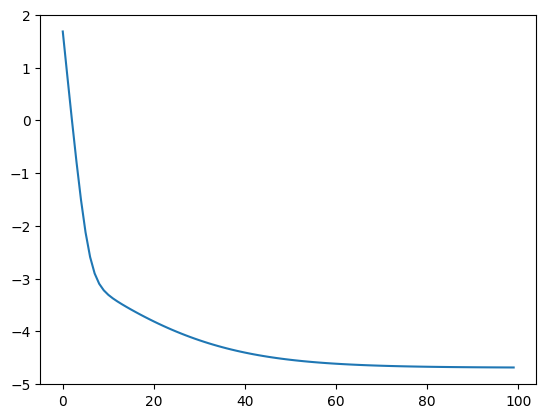

In [13]:
plt.plot(list(range(len(cost_list))), np.log(cost_list))

이제 기본적인 원리는 이해했다. <br>
이것을 더 쉽게 할 수 있도록 딥러닝 라이브러리에 많은 기능이 있다. <br>
우리는 대충 이런 수학적 원리가 있다. <br>
결국 어떤 거대한 함수를 만들어서 최적화하는 과정이라는 것만 이해하면 된다. <br>

epoches는 얼마나 데이터를 반복해서 볼지 결정한다. <br>
batch는 효율적으로 한번에 묶어서 학습을 시키고 이상치가 들어가서 확 변하는 것을 막는다. <br>
learning rate는 학습률인데 적당한 값으로 설정해야 한다. <br>
그래디언트 방향으로 얼마나 빠르게 이동할지 결정한다. <br>
클수록 학습이 빠르게 진행되지만 아래와 같은 상황이 생길 수 있다. <br>
<img src=img.png width=300><br>